<a href="https://colab.research.google.com/github/bonareri/Machine-Learning/blob/main/Neural_networks_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [4]:
#load data
df = pd.read_csv('/content/winequality-red.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Explore the Dataset

In [6]:
# Dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [8]:
# Basic descriptive statistics
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [9]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## Preprocessing the Data

### Feature Scaling

In [45]:
# Features and target variable
X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target

In [46]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Check the unique categories in the 'quality' column
print(df['quality'].unique())

[5 6 7 4 8 3]


### Train-Test Split

In [47]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Build the Neural Network

In [48]:
# Define the model
model = Sequential()

In [49]:
# Add input layer (number of features = X_train.shape[1])
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# Add hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

In [51]:
# Output layer (single neuron for regression)
model.add(Dense(1))

In [52]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

## Train Model

In [53]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 22.7342 - val_loss: 3.8288
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0524 - val_loss: 1.9432
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0298 - val_loss: 1.5375
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5011 - val_loss: 1.2733
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2001 - val_loss: 1.1171
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0386 - val_loss: 0.9278
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8769 - val_loss: 0.8129
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6825 - val_loss: 0.7076
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6780 - val_loss: 0.6657
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5813 - val_loss: 0.5812
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5336 - val_loss: 0.5277
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0

## Evaluate the Model

In [54]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4976 
Test Loss: 0.4489133358001709


## Predictions

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


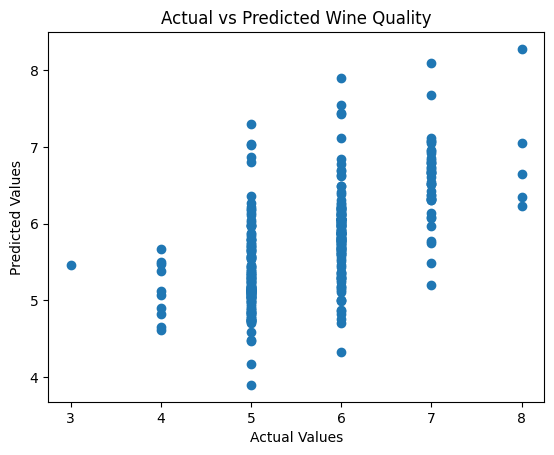

In [55]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compare actual vs predicted values (visualization)
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Wine Quality')
plt.show()

## Metrcs

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.4815148711204529
MSE: 0.4489133954048157
RMSE: 0.6700099964961834
